In [3]:
# from https://www.w3schools.com/python/python_mysql_create_db.asp
h='localhost'
u='root'
pw='Daxthejew'

import mysql.connector

mydb = mysql.connector.connect(host=h,user=u, password=pw)

In [2]:
# make test database

mycursor = mydb.cursor()

mycursor.execute("drop database test") #deletes previous runs
mycursor.execute("create DATABASE test")

#check if database exits (if it does run 'drop database test' instead)

mycursor.execute("SHOW DATABASES")

for x in mycursor:
    print(x)


NameError: name 'mydb' is not defined

In [ ]:
#try connecting to specific database

mydb = mysql.connector.connect(host=h, user=u, password=pw, database="test")

#let's add a table to our test data base
mycursor = mydb.cursor()


mycursor.execute("CREATE TABLE customers (name VARCHAR(255), address VARCHAR(255))")

# check if table exists
mycursor.execute("show tables")

for x in mycursor:
    print(x)


In [ ]:
# When creating a table, you should also create a column with a unique key for each record.
# This can be done by defining a PRIMARY KEY.
# statement "INT AUTO_INCREMENT PRIMARY KEY" which will insert a unique number for each record. 
# Starting at 1, and increased by one for each record.

#use ALTER to alter existing table by ADDing a column
mycursor.execute("ALTER TABLE customers ADD COLUMN id INT AUTO_INCREMENT PRIMARY KEY")

In [ ]:
#Ok, so we have a table with IDs, let's add values using variables/strings
sql = "INSERT INTO customers (name, address) VALUES (%s, %s)"
val = ("John", "Highway 21")

mycursor.execute(sql, val)
mydb.commit()
print(mycursor.rowcount, "record inserted.")


In [ ]:
#Let's now try to insert multiple rows

sql = "INSERT INTO customers (name, address) VALUES (%s, %s)"
val = [
  ('Peter', 'Lowstreet 4'),
  ('Amy', 'Apple st 652'),
  ('Hannah', 'Mountain 21'),
  ('Michael', 'Valley 345'),
  ('Sandy', 'Ocean blvd 2'),
  ('Betty', 'Green Grass 1'),
  ('Richard', 'Sky st 331'),
  ('Susan', 'One way 98'),
  ('Vicky', 'Yellow Garden 2'),
  ('Ben', 'Park Lane 38'),
  ('William', 'Central st 954'),
  ('Chuck', 'Main Road 989'),
  ('Viola', 'Sideway 1633')
]

mycursor.executemany(sql, val)

mydb.commit()

print(mycursor.rowcount, "was inserted.")

In [ ]:
# Now let's try to select items from database
mycursor.execute("SELECT * FROM customers")

myresult = mycursor.fetchall()

for x in myresult:
    print(x)

In [ ]:
# Let's say you only want a specific column

mycursor.execute("SELECT name, address FROM customers")

myresult = mycursor.fetchall()

for x in myresult:
    print(x)

In [ ]:
#Let's say you only want one row

mycursor.execute("SELECT * FROM customers")

myresult = mycursor.fetchone() #1st row by default

print(myresult)

In [ ]:
#Lets try using a filter to get a specific result

mydb = mysql.connector.connect(host=h, user=u, password=pw, database="test")

mycursor = mydb.cursor()

sql = "SELECT * FROM customers WHERE address = 'Park Lane 38'"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
    print(x)

In [ ]:
# Much like in bash, you can also use wildcards to filter results
# You can also select the records that starts, includes, or ends with a given letter or phrase.
# Use the %  to represent wildcard characters for addresses with the phrase "way":

sql = "SELECT * FROM customers WHERE address LIKE '%way%'"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
    print(x)

In [ ]:
# You can also sort results from your queries, in this case by name

sql = "SELECT * FROM customers ORDER BY name"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
    print(x)


In [ ]:
#you can also sort in descending order with DESC or ascending order with ASC 

sql = "SELECT * FROM customers ORDER BY name DESC"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
    print(x)

print(' ')
sql = "SELECT * FROM customers ORDER BY name ASC"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
    print(x)

In [ ]:
# # you can remove records with DELETE

# sql = "DELETE FROM customers WHERE address = 'Mountain 21'"

# mycursor.execute(sql)

# mydb.commit() #required or else changes won't be saved, kind of like git

# print(mycursor.rowcount, "record(s) deleted")


In [ ]:
# # how to delete a table

# sql = "DROP TABLE customers"
# mycursor.execute(sql)

In [ ]:
# # If the the table you want to delete is already deleted, or for any other reason does not exist,
# # you can use the IF EXISTS keyword to avoid getting an error.

# sql = "DROP TABLE IF EXISTS customers"
# mycursor.execute(sql)

In [ ]:
# You can update existing records in a table by using the "UPDATE" statement:
mydb = mysql.connector.connect(host=h, user=u, password=pw, database="test")

mycursor = mydb.cursor()

sql = "UPDATE customers SET address = 'Canyon 123' WHERE address = 'Valley 345'"
mycursor.execute(sql)
mydb.commit()
print(mycursor.rowcount, "record(s) affected")

In [ ]:
# Let's say you don't want all results but only a subset, let's do the first 5.
# You can limit the number of records returned from the query, by using the "LIMIT" statement:

mycursor.execute("SELECT * FROM customers LIMIT 5")

myresult = mycursor.fetchall()

for x in myresult:
    print(x)

In [ ]:
# Let's try from a specific row in the database, 3 to 5

mycursor.execute("SELECT * FROM customers LIMIT 5 OFFSET 2")  #offsets from 0

myresult = mycursor.fetchall()

for x in myresult:
    print(x)

# Let's try making a database for ecliptic longitudes and latitudes to filter

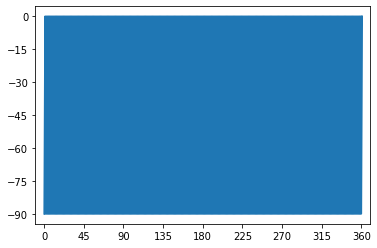

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
def SouthernHemisphere():
    #1st create southern hemisphere
    ECLONGS=[]
    ECLATS =[]
    for x in range(360+1):
        eclong = np.linspace(x,x+1,100)
        eclat = np.linspace(-90,0,100)
        ECLONGS=np.append(ECLONGS,eclong)
        ECLATS=np.append(ECLATS,eclat)    
        
        data=pd.DataFrame({'eclong':ECLONGS,'eclat':ECLATS})
    return data

data = SouthernHemisphere()

plt.plot(data['eclong'],data['eclat'])
plt.xlim(-10,370)
plt.xticks(np.arange(0,360+45,45))
plt.yticks(np.arange(-90,0+15,15))
plt.savefig('SouthernHemisphere.png')
plt.show()

#save data as csv file

data.to_csv('SouthernHemisphere.csv')

In [13]:
mydb = mysql.connector.connect(host=h, user=u, password=pw)
mycursor = mydb.cursor()

# mycursor.execute("drop DATABASE TESSSouth")
mycursor.execute("create DATABASE TESSSouth")
mycursor.execute("SHOW DATABASES")

for x in mycursor:
    print(x)

('information_schema',)
('mysql',)
('performance_schema',)
('sys',)
('TESS_South',)
('TESSSouth',)
('test',)


In [14]:
mydb = mysql.connector.connect(host=h, user=u, password=pw,database="TESSSouth", allow_local_infile=True)
mycursor = mydb.cursor()
#make table with id, eclong, eclat in coordinates table
sql="CREATE TABLE coordinates (id INT NOT NULL AUTO_INCREMENT, eclong VARCHAR(255) NOT NULL, eclat VARCHAR(255) NOT NULL, PRIMARY KEY (id));"

mycursor.execute(sql)

In [15]:
from mysql.connector.constants import ClientFlag
mydb = mysql.connector.connect(host=h, user=u, password=pw, database="TESSSouth", allow_local_infile=True, client_flags=[ClientFlag.LOCAL_FILES])
mycursor = mydb.cursor()
mycursor.execute("show tables")
for x in mycursor:
    print(x)

('coordinates',)


In [16]:
data

,eclong,eclat
0,0.000000,-90.000000
1,0.010101,-89.090909
2,0.020202,-88.181818
3,0.030303,-87.272727
4,0.040404,-86.363636
...,...,...
36095,360.959596,-3.636364
36096,360.969697,-2.727273
36097,360.979798,-1.818182
36098,360.989899,-0.909091


In [17]:
mydb = mysql.connector.connect(host=h, user=u, password=pw, database="TESSSouth", allow_local_infile=True)#, client_flags=[ClientFlag.LOCAL_FILES])
cursor = mydb.cursor()

import os
filepath=os.getcwd()+'/SouthernHemisphere.csv'


# Now load csv into sql table
LoadSQL = """LOAD DATA LOCAL INFILE '%s'
    INTO TABLE %s
    FIELDS TERMINATED BY ',' ENCLOSED BY '"'
    LINES TERMINATED BY '\r\n'
    IGNORE 1 LINES;
    (id, eclong, eclat)""" % (filepath, 'coordinates')

cursor.execute(LoadSQL)
mydb.commit()
cursor.close()
mydb.close()

MySQLInterfaceError: Commands out of sync; you can't run this command now

In [18]:
config = {
    'user': u,
    'password': pw,
    'host': h,
    'buffered': True,
    'allow_local_infile':True,
    'client_flags': [ClientFlag.SSL]
}



mydb = mysql.connector.connect(**config)
mycursor = mydb.cursor()
mycursor.execute("drop DATABASE test")
mycursor.execute("create DATABASE test")
mycursor.execute("use test")
mycursor.execute("create table coords (id char(13), eclong decimal(12,8), eclat decimal(12,8));")

In [19]:
import mysql.connector
from mysql.connector.constants import ClientFlag

config = {
    'user': u,
    'password': pw,
    'host': h,
    'database': 'test',
    'buffered': True,
    'allow_local_infile':True,
    'client_flags': [ClientFlag.SSL]
}



mydb = mysql.connector.connect(**config)
cursor = mydb.cursor()
cursor.execute('set global local_infile=1')

import os
filepath=os.getcwd()+'/test.csv'


# Now load csv into sql table
LoadSQL = "load data local infile '"+str(filepath)+"' into table coords fields terminated by ',' (id,eclong,eclat);"

cursor.execute(LoadSQL)
mydb.commit()
cursor.close()
mydb.close()

In [ ]:
config = {
    'user': u,
    'password': pw,
    'host': h,
    'buffered': True,
    'allow_local_infile':True,
    'client_flags': [ClientFlag.SSL]
}



mydb = mysql.connector.connect(**config)
mycursor = mydb.cursor()
mycursor.execute("drop DATABASE TESSSouth")
mycursor.execute("create DATABASE TESS_South")
mycursor.execute("use TESS_South")
mycursor.execute("create table coords (id char(13), eclong decimal(12,8), eclat decimal(12,8));")


In [ ]:
import mysql.connector
from mysql.connector.constants import ClientFlag

config = {
    'user': u,
    'password': pw,
    'host': h,
    'database': 'TESS_South',
    'buffered': True,
    'allow_local_infile':True,
    'client_flags': [ClientFlag.SSL]
}



mydb = mysql.connector.connect(**config)
cursor = mydb.cursor()
cursor.execute('set global local_infile=1')

import os
filepath=os.getcwd()+'/SouthernHemisphere.csv'

# Now load csv into sql table
LoadSQL = "load data local infile '"+str(filepath)+"' into table coords fields terminated by ',' (id,eclong,eclat);"

cursor.execute(LoadSQL)
mydb.commit()
cursor.close()
mydb.close()

# Now that we uploaded our simulated darta to mysql, let's see if we can properly filter by sector

In [4]:
#This is what the filtered sectors should look like:

def SectorBounds_shift(Sector):
    #1st create southern hemisphere
    ECLONGS=[]
    ECLATS =[]
    for x in range(360+1):
        eclong = np.linspace(x,x+1,100)
        eclat = np.linspace(-90,0,100)
        ECLONGS=np.append(ECLONGS,eclong)
        ECLATS=np.append(ECLATS,eclat)    
    #then store in dataframe
    simDF=pd.DataFrame({"eclong":ECLONGS,"eclat":ECLATS})    
    
    #then make sky cut depending on Sector
    #these are central ecliptic longitude pointings for S1 - S13
    ctr_eclongs = [315.8,343,10.94,38.48,65.85,92.85,119.738980,146.15,172.28,198.72,225.93,253.56,281.12]
    
    Sector_ind=Sector-1 #zero indexing
    
    x = np.array(np.remainder(simDF['eclong']+360-ctr_eclongs[Sector_ind],360)) # shift lon values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    
    cut = (x < 12/np.cos(simDF['eclat']*np.pi/180)) & (-12/np.cos(simDF['eclat']*np.pi/180) < x)
    cutDF = simDF.loc[(simDF['eclat'] < -6) & (cut) ]
    
    return cutDF


S1 = SectorBounds_shift(1)
S2 = SectorBounds_shift(2)
S3 = SectorBounds_shift(3)
S4 = SectorBounds_shift(4)

fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(111)
# ax2=fig.add_subplot(412)
# ax3=fig.add_subplot(413)
# ax4=fig.add_subplot(414)

ax1.plot(S1['eclong'],S1['eclat'])
# ax2.plot(S2['eclong'],S2['eclat'])
# ax3.plot(S3['eclong'],S3['eclat'])
# ax4.plot(S4['eclong'],S4['eclat'])

fig.text(0.45,-0.01,'Ecliptic Longitude',fontsize=12)
fig.text(-0.01,0.45,'Ecliptic Latitude',rotation=90,fontsize=12)
fig.tight_layout(pad=1)
fig.savefig('Sector1_bounds.png',bbox_inches='tight')
plt.show()



def shift_lon_get_x(lon, origin):
    x = np.array(np.remainder(lon+360-origin,360)) # shift lon values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    return x

fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(411)
ax2=fig.add_subplot(412)
ax3=fig.add_subplot(413)
ax4=fig.add_subplot(414)

ax1.plot(shift_lon_get_x(S1['eclong'], 315),S1['eclat'])
ax2.plot(shift_lon_get_x(S2['eclong'], 343),S2['eclat'])
ax3.plot(shift_lon_get_x(S3['eclong'], 10.94),S3['eclat'])
ax4.plot(shift_lon_get_x(S4['eclong'], 38),S4['eclat'])

fig.text(0.45,-0.01,'Shifted to 0: Ecliptic Longitude',fontsize=12)
fig.text(-0.01,0.45,'Ecliptic Latitude',rotation=90,fontsize=12)
fig.tight_layout()
plt.show()

NameError: name 'np' is not defined

In [10]:
import mysql.connector
from mysql.connector.constants import ClientFlag
import pandas as pd

config = {
    'user': u,
    'password': pw,
    'host': h,
    'database': 'TESS_South',
    'buffered': True,
    'allow_local_infile':True,
    'client_flags': [ClientFlag.SSL]
}



mydb = mysql.connector.connect(**config)
cursor = mydb.cursor()

#Sector 1
query = "select * from coords where eclat < -6 and mod(abs(eclong+360-315.8),360) < 180 and mod(abs(eclong+360-315.8),360) < 12/cos(radians(eclat));"
query = "select * from coords where eclat < -6 and mod(abs(eclong-315.8+360),360)-360 < 180 and mod(abs(eclong-315.8),360) < 12/cos(radians(eclat));"
query = """select * from coords
    where eclat < -6
    and mod(abs(eclong-315.8+360),360)-360 < 180
    and mod(abs(eclong-315.8),360) < 12/cos(radians(eclat))
    """
cursor.execute(query)
import csv
rows = cursor.fetchall()
headers = [col[0] for col in cursor.description] # get headers
fp = open('filter1.csv', 'w')
myFile = csv.writer(fp)
myFile.writerow(headers)
myFile.writerows(rows)
fp.close()

filter1=pd.read_csv('filter1.csv')
plt.plot(S1['eclong'],S1['eclat'],'r.',label='Python')
plt.plot(filter1['eclong'],filter1['eclat'],'b.',label='SQL')
plt.xlim(-10,370)
plt.ylim(-100,10)
plt.xticks(np.arange(0,360+45,45))
plt.yticks(np.arange(-90,0+15,15))
plt.xlabel('Ecliptic Longitude')
plt.ylabel('Ecliptic Latitude')
plt.legend(loc='upper left',ncol=2)
plt.tight_layout(pad=1)
plt.savefig('SQL_vs_Python_query_S1.png',bbox_inches='tight')
plt.show()

NameError: name 'S1' is not defined

In [ ]:
# x = np.array(np.remainder(simDF['eclong']+360-ctr_eclongs[Sector_ind],360)) # shift lon values
# ind = x>180
# x[ind] -=360    # scale conversion to [-180, 180]
# x=-x    # reverse the scale: East to the left

In [ ]:
import mysql.connector
from mysql.connector.constants import ClientFlag

config = {
    'user': u,
    'password': pw,
    'host': h,
    'database': 'TESS_South',
    'buffered': True,
    'allow_local_infile':True,
    'client_flags': [ClientFlag.SSL]
}



mydb = mysql.connector.connect(**config)
cursor = mydb.cursor()

#Sector 1
query = """select * from coords
    where eclat < -6
    and mod(abs(eclong-315.8+360),360)-360 < 180
    and mod(abs(eclong-315.8),360) < 12/cos(radians(eclat))
    """
#try a case statement
query = """select * from coords,
    case 
    when eclat < -6 then eclong-360
    else eclong
    end as good_eclong
    from 'eclong'"""


cursor.execute(query)
import csv
rows = cursor.fetchall()
headers = [col[0] for col in cursor.description] # get headers
fp = open('filter2.csv', 'w')
myFile = csv.writer(fp)
myFile.writerow(headers)
myFile.writerows(rows)
fp.close()

filter1=pd.read_csv('filter2.csv')
plt.plot(shift_lon_get_x(S1['eclong'], 315),S1['eclat'],'r.')
plt.plot(shift_lon_get_x(filter1['eclong'], 315),filter1['eclat'],'b.')
# plt.xlim(-10,370)
plt.xlim(-190,190)
plt.ylim(-100,10)
plt.xticks(np.arange(-180,180+45,45))
plt.yticks(np.arange(-90,0+15,15))
plt.show()

In [ ]:
(eclat < -6 and mod(abs(eclong-315.8+360),360)-360 < 180 and mod(abs(eclong-315.8),360) < 12/cos(radians(eclat)))